In [24]:
import math 
#calculate differential stress
d = 9.2# grain size in microns
B = 2451 #2451 (holyoke 2010) #3631 (stipp 2003)
m = -1.26 # 
s = []# (MPa) Differential Stress

In [42]:
class Shearzone():
    def __init__(self, grain_size, constant_b, exponent):
        self.constant_b = constant_b 
        self.grain_size = grain_size 
        self.exponent = exponent
    
    def calculate_differential_stress(self): 
        part = (math.log(self.grain_size)-math.log(self.constant_b))/self.exponent
        s = math.exp(part)
        return s
    
def simulate_grain_size(range_min, range_max):
    B = 2451 #2451 (holyoke 2010) #3631 (stipp 2003)
    m = -1.26 # 
    diffs = []
    for x in range(range_min,range_max):
        part = (math.log(x)-math.log(B))/m
        s = math.exp(part)
        diffs.append(s)
    return diffs 

        

In [35]:
shear_zone = Shearzone(grain_size=d, constant_b=B, exponent=m)
diff = shear_zone.calculate_differential_stress()
print(diff)

64.87598059036497


In [46]:
simulate_grain_size(3,35)

[204.77990936946233,
 162.97823828681044,
 136.52648537471026,
 118.13392985387905,
 104.53031972346173,
 94.01928064508654,
 85.62876571387406,
 78.75972939002484,
 73.02185778474386,
 68.14938743596466,
 63.95477616509253,
 60.30170389193688,
 57.08858093494728,
 54.23807022299194,
 51.690203973650206,
 49.39772965748533,
 47.322883418734996,
 45.43510335423156,
 43.70937698506197,
 42.125026092180036,
 40.6647991076296,
 39.31418360196639,
 38.06087879458908,
 36.89438609759559,
 35.805687873670664,
 34.78699292119999,
 33.83153299615487,
 32.933398771355584,
 32.08740656017529,
 31.288989251248243,
 30.53410645358016,
 29.819170001383455]

In [ ]:
%matplotlib nbagg

import matplotlib
import numpy as n
import matplotlib.pyplot as plt
import os
import math
from matplotlib import cm

#Define Constants
R = 8.3144598 #Gas constant
w = 30000 # (mm) shear zone width

#Define flow laws
FL = []#Paper, A, N, Q in that order
FL = [
      #['GT95wom', 0.00011, 4, 137000],
      ['KT84', 0.0000022, 2.7, 120000],
      ['GT95wm', 0.000000018, 4, 137000],
      ['J84', 0.00288, 1.8, 151000],
      ['K89', 0.0000011, 2.7, 134000],
      ['HC82', 0.0199, 1.8, 167000],
      ['LP92g', 0.000000066, 3.1, 135000],
      ['LP92a', 3.98E-10, 4, 135000],
      ['H01', 6.3E-12, 4, 135000],
      ['RB04',0.000012, 2.97, 242000]
      ]

#Set temperature range
Tc = []
for i in range(300, 602, 25):#min, max, step interval
    T = i
    Tc.append(T)
Tk = []
for i in range(len(Tc)): 
    T = Tc[i]+273.15
    Tk.append(T)

#Calculate strain rate for all flow laws over temperature range, store in list
e = []
for j in range(0,len(FL)):
    f = []
    for i in range(0, len(Tk)):
        element = FL[j][1]*s**(FL[j][2])*math.exp(-FL[j][3]/(R*Tk[i]))#Flow law equation
        f.append(element)
        if len(f) == len(Tk):
            e.append(f)
            del f

#Include effect of water fugacity
F = 300 #MPa (Water Fugacity)
e = []
for j in range(0,len(FL)):
    f = []
    for i in range(0, len(Tk)):
        element = FL[j][1]*s**(FL[j][2])*F*math.exp(-FL[j][3]/(R*Tk[i]))#Flow law equation
        f.append(element)
        if len(f) == len(Tk):
            e.append(f)
            del f

#Calculate slip rate
V = []
for i in range(0, len(FL)):
    f = []
    for j in range(0, len(Tk)):
        element = w*31540000*e[i][j]#slip rate calculation
        f.append(element)
        if len(f) == len(Tk):
            V.append(f)
            del f

<IPython.core.display.Javascript object>


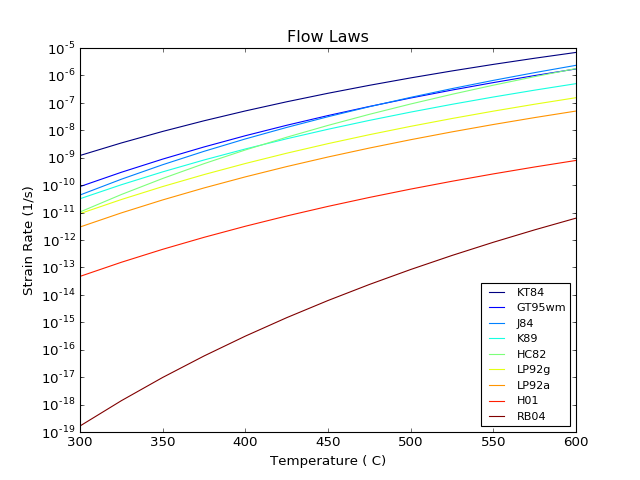

In [737]:
%matplotlib nbagg

colors = iter(cm.jet(np.linspace(0, 1, len(e))))#set color ramp to jet with a line spacing of length e

plt.gca().set_yscale('log') #set y axis to log 
 
labels = []
for i in range(0,len(FL)):
    l = FL[i][0]
    labels.append(l)
    plt.plot(Tc, e[i], color=next(colors))
    

    
plt.xlabel('Temperature ( C)')
plt.ylabel('Strain Rate (1/s)')
plt.title('Flow Laws')
#for i in range(0, len(Tc)):
 #   plt.text(450,e[i][6],labels[i], fontsize=10, rotation = 8)
plt.legend(labels, fontsize=10, loc=4)
plt.show()

<IPython.core.display.Javascript object>


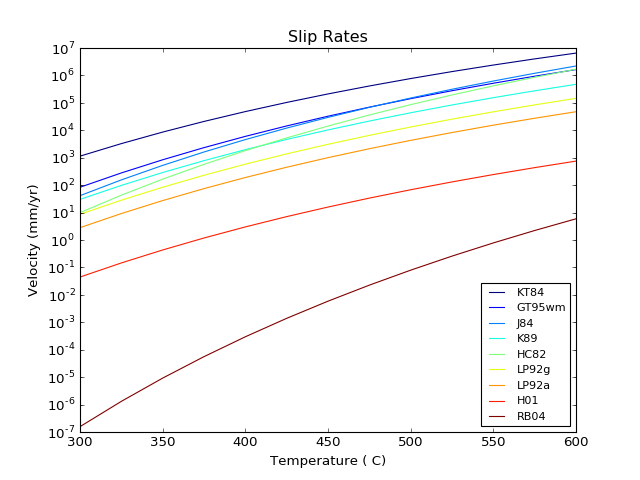

In [738]:
%matplotlib nbagg

colors = iter(cm.jet(np.linspace(0, 1, len(V))))#set color ramp to jet with a line spacing of length e

plt.gca().set_yscale('log') #set y axis to log 
 
labels = []
for i in range(0,len(FL)):
    l = FL[i][0]
    labels.append(l)
    plt.plot(Tc, V[i], color=next(colors))
    

    
plt.xlabel('Temperature ( C)')
plt.ylabel('Velocity (mm/yr)')
plt.title('Slip Rates')
#for i in range(0, len(Tc)):
 #   plt.text(450,e[i][6],labels[i], fontsize=10, rotation = 8)
plt.legend(labels, fontsize=10, loc=4)
plt.show()

In [732]:
#Save figure to pdf
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('SlipRatesNEW.pdf') as pdf:
    pdf.savefig()  # saves the current figure into a pdf page

<IPython.core.display.Javascript object>


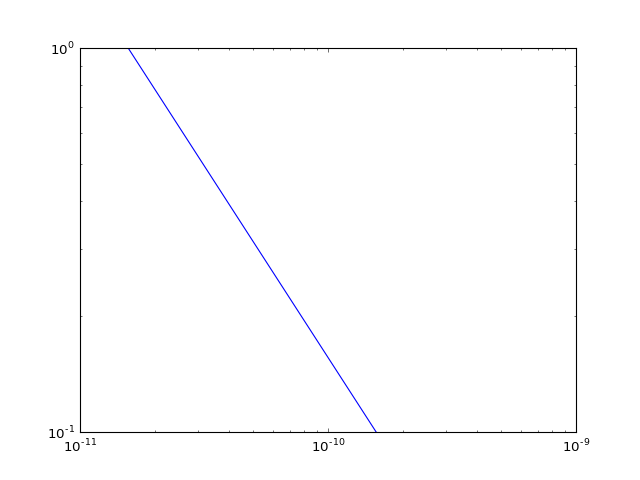

[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [656]:
# strain rate as a function of chaging widths
ehat = FL[7][1]*s**(FL[7][2])*F*math.exp(-FL[7][3]/(R*683.15))#Flow law equation (Hirth et al 2001)

sr = ehat*1000*31540000
w = [0.01]
st = []
strain = []
#np.linspace(0.0, 1.0, 21)int(1/0.05)
w = [i/100.0 for i in range(100, 1, -10)]#creates the range of widths of the shear zone chaging during folding

for i in range(0,len(w)):   
    f = sr/(w[i]*1000)#calculate strain rate fluctuation during changing widths
    st.append(f)
    f = st[i]/31540000
    strain.append(f)
#strain
#sr #mm/yr

strain
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.plot(strain, w)
w

In [596]:
w = [i/100.0 for i in range(1000, 0, -10)]


25.215171208001713